<a href="https://colab.research.google.com/github/gbpereira/time_prediction/blob/main/analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependências

In [1]:
!pip install seaborn
!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime, timedelta

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
url = 'https://raw.githubusercontent.com/gbpereira/time_prediction/main/data/dataset.csv'
dataset = pd.read_csv(url)
dataset.head()

,quantity,holiday,time_elapsed,ongoing_orders,waze_avg_time,waze_avg_distance,datetime,reseller
0,1,False,18.459633,1,8.583333,3.136,2022-09-01 10:50:00,B
1,1,False,31.472517,0,11.183333,5.397,2022-09-01 13:21:00,A
2,1,False,29.343333,0,8.400000,3.123,2022-09-01 17:51:00,A
3,1,False,46.103800,0,12.733333,4.536,2022-09-01 18:35:00,B
4,1,False,20.950450,0,8.866667,3.524,2022-09-02 10:13:00,D


In [5]:
print(dataset.shape)
dataset.head()

(8421, 8)


,quantity,holiday,time_elapsed,ongoing_orders,waze_avg_time,waze_avg_distance,datetime,reseller
0,1,False,18.459633,1,8.583333,3.136,2022-09-01 10:50:00,B
1,1,False,31.472517,0,11.183333,5.397,2022-09-01 13:21:00,A
2,1,False,29.343333,0,8.400000,3.123,2022-09-01 17:51:00,A
3,1,False,46.103800,0,12.733333,4.536,2022-09-01 18:35:00,B
4,1,False,20.950450,0,8.866667,3.524,2022-09-02 10:13:00,D


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8421 entries, 0 to 8420
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   quantity           8421 non-null   int64  
 1   holiday            8421 non-null   bool   
 2   time_elapsed       8421 non-null   float64
 3   ongoing_orders     8421 non-null   int64  
 4   waze_avg_time      8421 non-null   float64
 5   waze_avg_distance  8421 non-null   float64
 6   datetime           8421 non-null   object 
 7   reseller           8421 non-null   object 
dtypes: bool(1), float64(3), int64(2), object(2)
memory usage: 468.9+ KB


In [7]:
dataset.describe(include='all')

,quantity,holiday,time_elapsed,ongoing_orders,waze_avg_time,waze_avg_distance,datetime,reseller
count,8421.000000,8421,8421.000000,8421.000000,8421.000000,8421.000000,8421,8421
unique,NaN,2,NaN,NaN,NaN,NaN,8298,6
top,NaN,False,NaN,NaN,NaN,NaN,2023-02-19 12:29:00,A
freq,NaN,8182,NaN,NaN,NaN,NaN,3,3522
mean,1.038950,NaN,34.273617,1.107469,12.047387,4.862416,NaN,NaN
std,0.213895,NaN,15.534184,1.328106,5.398807,2.490692,NaN,NaN
min,1.000000,NaN,4.435383,0.000000,1.983333,0.717000,NaN,NaN
25%,1.000000,NaN,23.692417,0.000000,8.366667,3.240000,NaN,NaN
50%,1.000000,NaN,31.131583,1.000000,11.233333,4.331000,NaN,NaN
75%,1.000000,NaN,40.984167,2.000000,14.200000,5.697000,NaN,NaN


# Constantes e variáveis globais

In [8]:
weekdays = dict(
    [
        (0, "dom"),
        (1, "seg"),
        (2, "ter"),
        (3, "qua"),
        (4, "qui"),
        (5, "sex"),
        (6, "sab")
    ]
)

# Derivações

In [9]:
# funcoes auxiliares
def hour_to_dec(time):
  hour, minutes = str(time).split(':')
  return round(float(hour) + float(minutes) / 60.0, 2)

def get_plain_hour(string):
  timestamp = datetime.strptime(string, '%Y-%m-%d %H:%M:%S')
  return timestamp.strftime('%H:%M')

def get_date(string):
    return datetime.strptime(string, '%d/%m/%Y')

def get_day(string):
  timestamp = datetime.strptime(string, '%Y-%m-%d %H:%M:%S')
  return timestamp.day

def get_week_day(string):
  timestamp = datetime.strptime(string, '%Y-%m-%d %H:%M:%S')
  return timestamp.weekday()

def to_datetime(string):
  return datetime.strptime(string, '%Y-%m-%d %H:%M:%S')

def get_delta(start_date, delta):
    return start_date - timedelta(days=delta)

def get_mean_from_90_days(df, row):
    delta = get_delta(row['datetime'], 90)
    reseller = row['reseller']
    df_filter = (df['datetime'] >= delta) & (df['datetime'] <= row['datetime']) & (df['reseller'] == reseller)
    return df[df_filter]['time_elapsed'].mean()

def get_mean(reseller, start_date, end_date):
    conditions = (dataset['datetime'] >= start_date) & (dataset['datetime'] <= end_date) & (dataset['reseller'] == reseller)
    return dataset[conditions]['time_elapsed'].mean()

In [10]:
derivations = []
for index, row in dataset.iterrows():
    derivations.append([hour_to_dec(get_plain_hour(row['datetime'])), get_day(row['datetime']), weekdays[get_week_day(row['datetime'])]])
tmp_df = pd.DataFrame(derivations, columns=['hour', 'day', 'wday'])
dataset = pd.concat([dataset, tmp_df], axis=1)

# converte o valor das colunas para timestamp
dataset['datetime'] = dataset['datetime'].apply(lambda x: to_datetime(x))

# adiciona a coluna `average_delivery`
derivations = []
for index, row in dataset.iterrows():
    derivations.append([get_mean_from_90_days(dataset, row)])

columns = ['average_delivery']
tmp_df = pd.DataFrame(derivations, columns=columns)
dataset = pd.concat([dataset, tmp_df], axis=1)

dataset.head()

,quantity,holiday,time_elapsed,ongoing_orders,waze_avg_time,waze_avg_distance,datetime,reseller,hour,day,wday,average_delivery
0,1,False,18.459633,1,8.583333,3.136,2022-09-01 10:50:00,B,10.83,1,qua,18.459633
1,1,False,31.472517,0,11.183333,5.397,2022-09-01 13:21:00,A,13.35,1,qua,31.472517
2,1,False,29.343333,0,8.400000,3.123,2022-09-01 17:51:00,A,17.85,1,qua,30.407925
3,1,False,46.103800,0,12.733333,4.536,2022-09-01 18:35:00,B,18.58,1,qua,32.281717
4,1,False,20.950450,0,8.866667,3.524,2022-09-02 10:13:00,D,10.22,2,qui,20.950450


# Gráficos

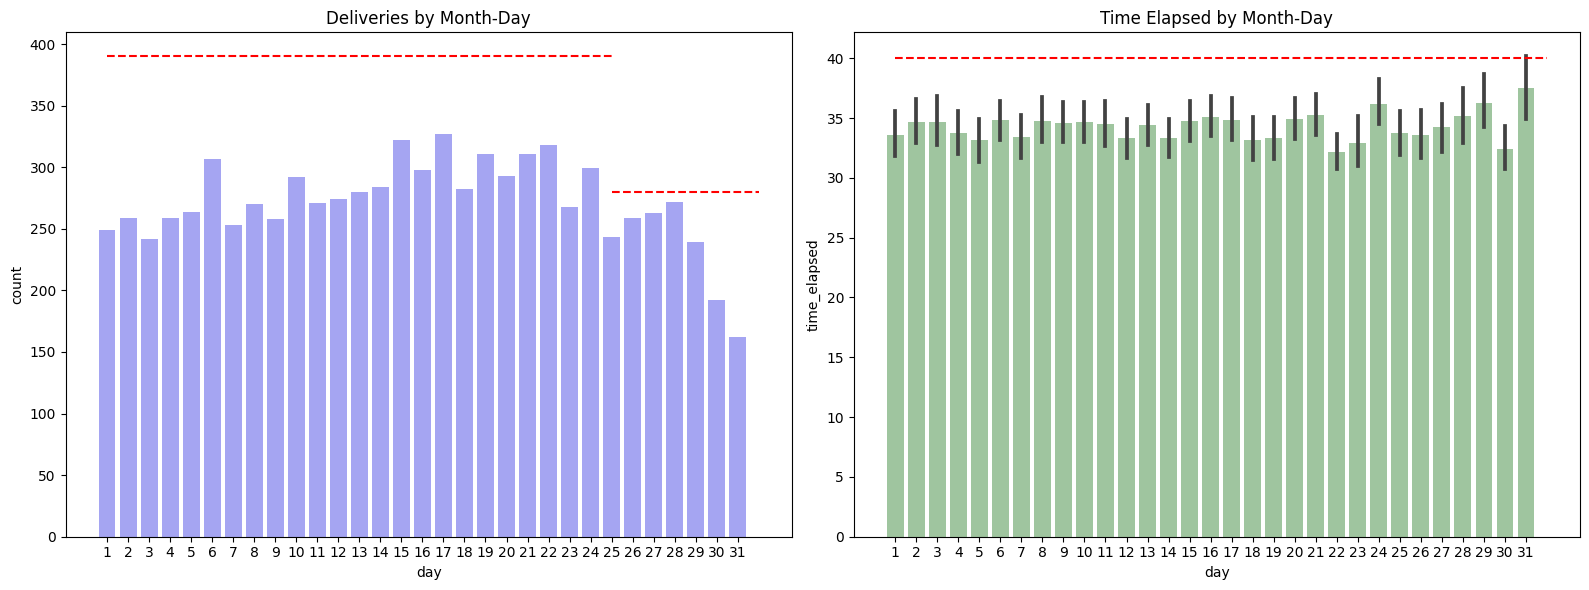

Weak or no relations appeared
                  day  time_elapsed
day           1.00000       0.01066
time_elapsed  0.01066       1.00000


In [11]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

sns.countplot(x=dataset['day'],ax=ax[0],color='blue',alpha=0.4)
ax[0].set_title('Deliveries by Month-Day')

ax[0].hlines(390,0,24,color='r',linestyle='--')
ax[0].hlines(280,24,31,color='r',linestyle='--')

sns.barplot(x=dataset['day'], y=dataset['time_elapsed'],ax=ax[1],color='green',alpha=0.4)
ax[1].set_title('Time Elapsed by Month-Day')

ax[1].hlines(40,0,31,color='r',linestyle='--')

plt.tight_layout()
plt.show()

print('Weak or no relations appeared')
print(dataset[['day','time_elapsed']].corr())

Entregras por dia da semana e Tempos de entrega por dia da semana

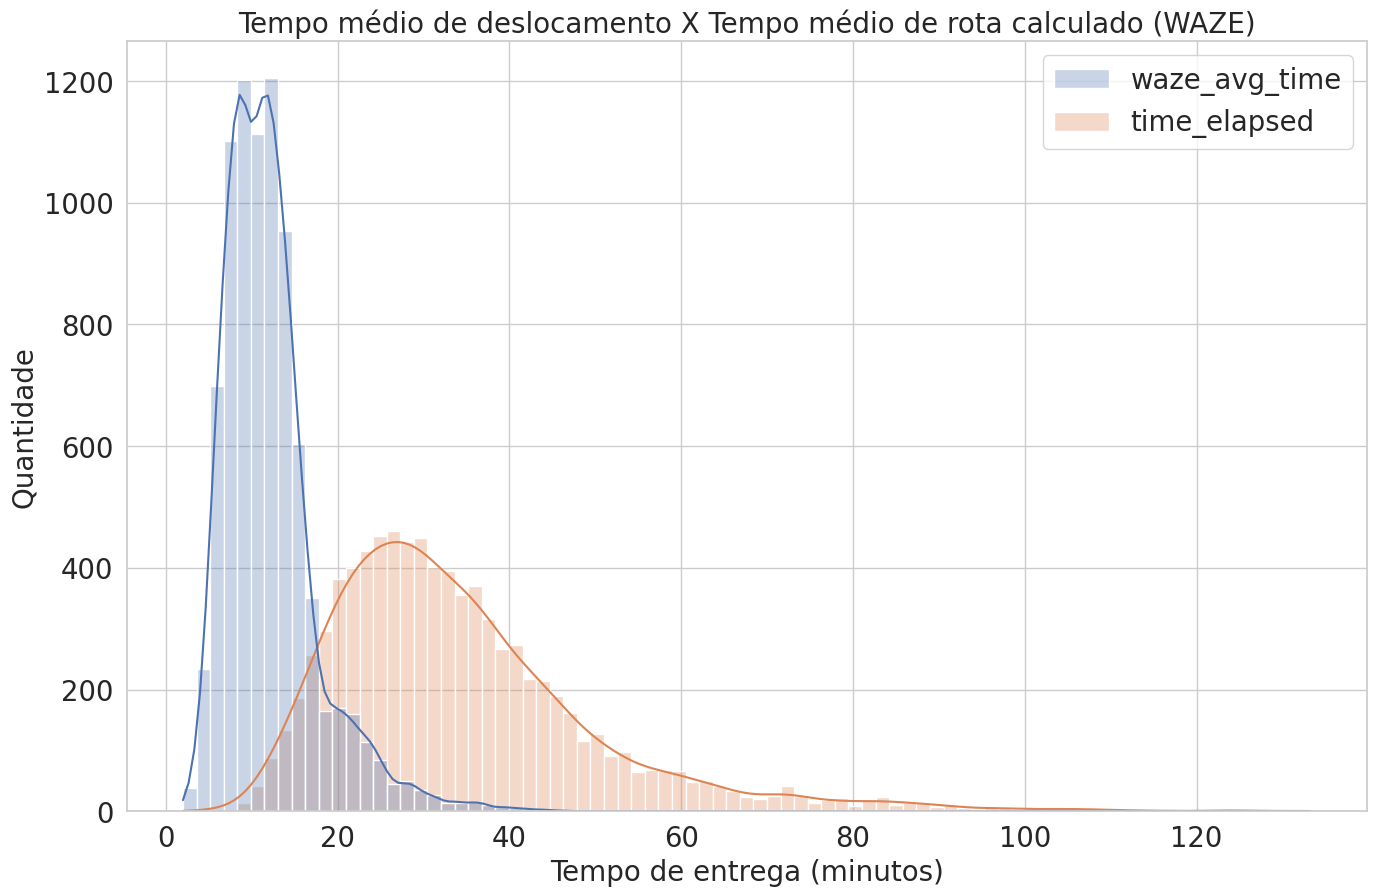

In [12]:
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid", font_scale=1.8)
sns.histplot(dataset[['waze_avg_time','time_elapsed']], color='blue', alpha=0.3, kde=True)

plt.title("Tempo médio de deslocamento X Tempo médio de rota calculado (WAZE)", fontsize = 20)
plt.xlabel('Tempo de entrega (minutos)', fontsize = 20)
plt.ylabel('Quantidade', fontsize = 20)

plt.show()

print('Week correlations, but Elapse Time >> Waze Time')
print(dataset[['waze_avg_time','time_elapsed']].corr())

Week correlations, but Elapse Time >> Waze Time
               waze_avg_time  time_elapsed
waze_avg_time       1.000000      0.886398
time_elapsed        0.886398      1.000000


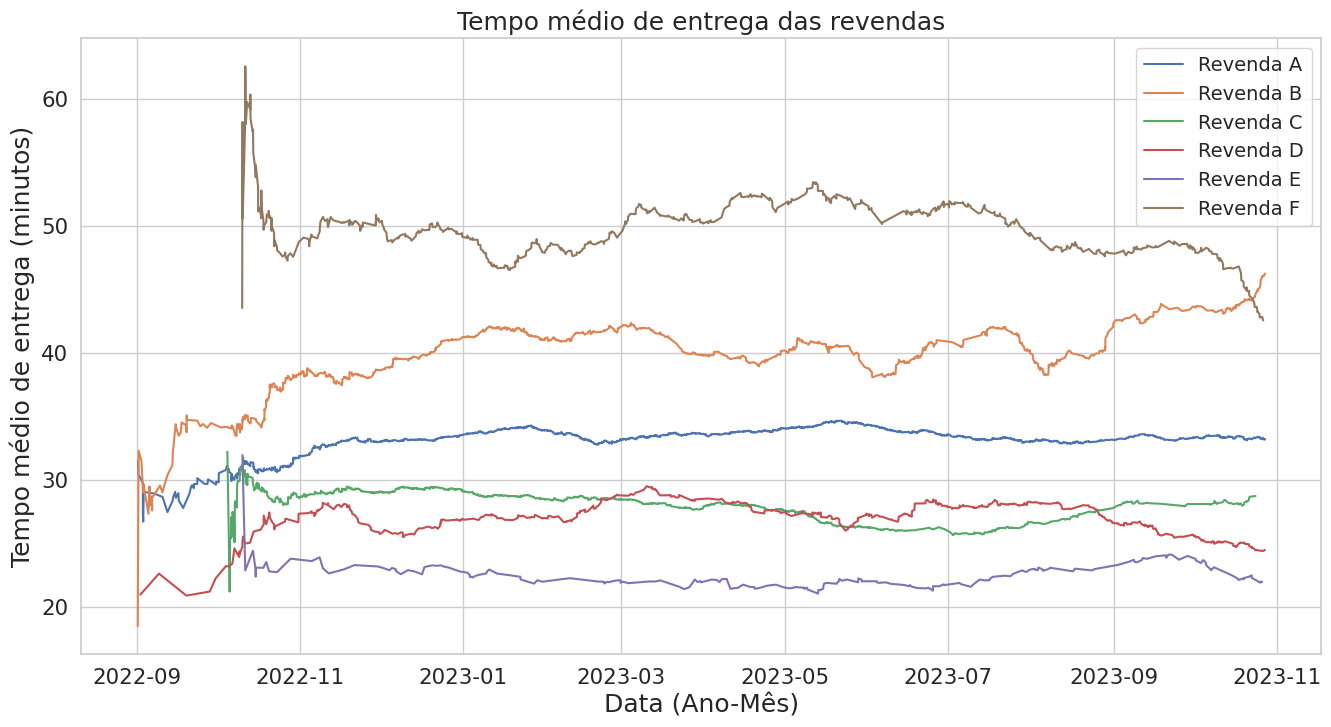

A evolução do tempo médio de entrega das Revendas não possui o mesmo padrão mas a maioria das revendas apresenta uma tendência de queda


In [13]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid", font_scale=1.4)

sns.lineplot(x = 'datetime', y = 'average_delivery', data = dataset[dataset['reseller'] == 'A'], label = 'Revenda A')
sns.lineplot(x = 'datetime', y = 'average_delivery', data = dataset[dataset['reseller'] == 'B'], label = 'Revenda B')
sns.lineplot(x = 'datetime', y = 'average_delivery', data = dataset[dataset['reseller'] == 'C'], label = 'Revenda C')
sns.lineplot(x = 'datetime', y = 'average_delivery', data = dataset[dataset['reseller'] == 'D'], label = 'Revenda D')
sns.lineplot(x = 'datetime', y = 'average_delivery', data = dataset[dataset['reseller'] == 'E'], label = 'Revenda E')
sns.lineplot(x = 'datetime', y = 'average_delivery', data = dataset[dataset['reseller'] == 'F'], label = 'Revenda F')

plt.title("Tempo médio de entrega das revendas", fontsize = 18)
plt.legend(fontsize = 14)
plt.ylabel('Tempo médio de entrega (minutos)', fontsize = 18)
plt.xlabel('Data (Ano-Mês)',fontsize = 18)
plt.show()

print("A evolução do tempo médio de entrega das Revendas não possui o mesmo padrão mas a maioria das revendas apresenta uma tendência de queda")

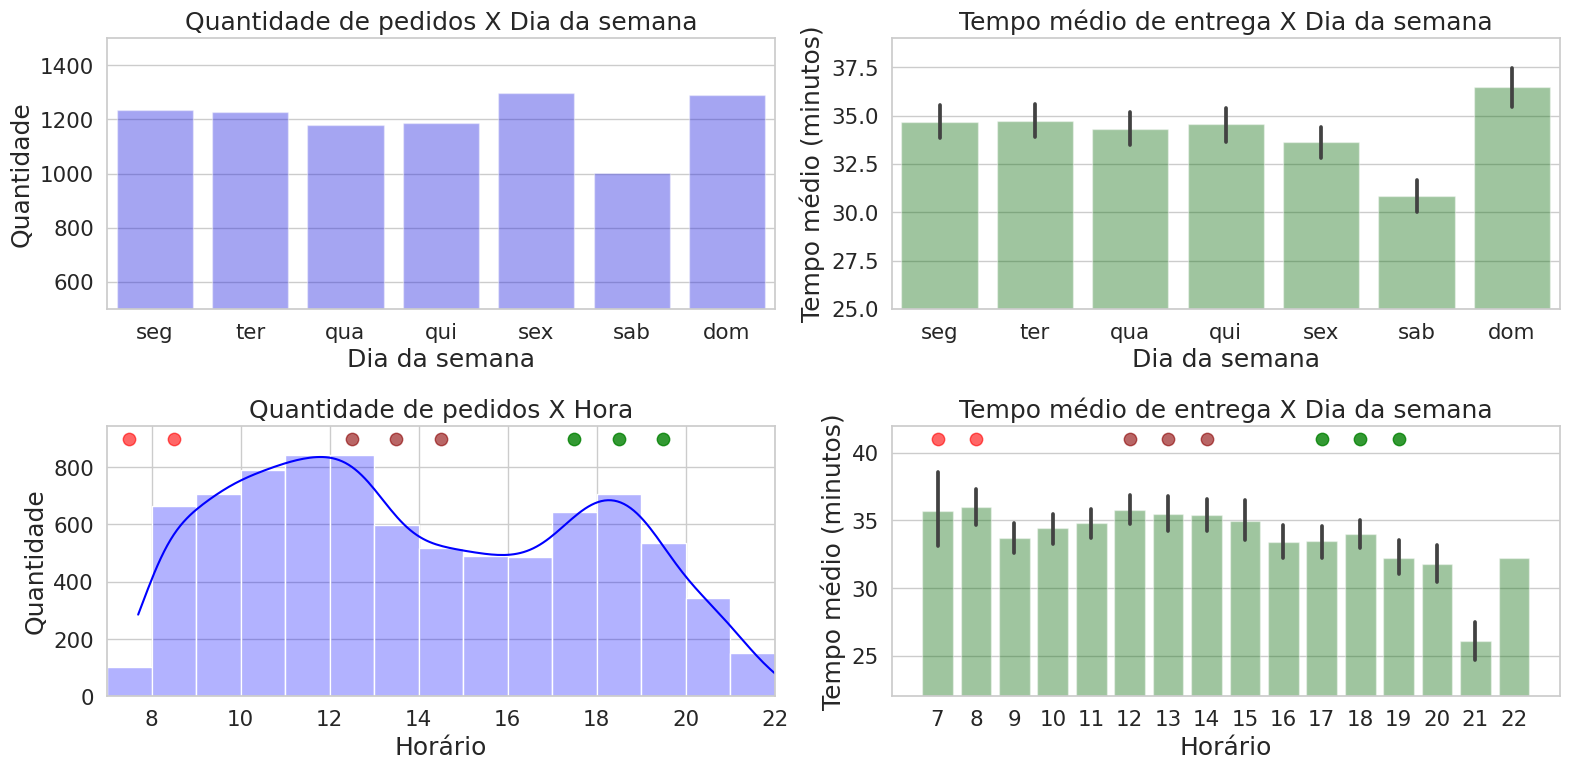

A quantidade de entrega se relaciona ligeiramente


In [14]:
fig, ax = plt.subplots(2,2,figsize=(16,8))

sns.set(style="whitegrid", font_scale=1.4)
sns.countplot(x=dataset['wday'], order=['seg', 'ter', 'qua', 'qui', 'sex', 'sab', 'dom'],
              ax=ax[0, 0],color='blue',alpha=0.4)
ax[0, 0].set_ylim([500, 1500])
ax[0, 0].set_title('Quantidade de pedidos X Dia da semana',fontsize = 18)
ax[0, 0].set_xlabel('Dia da semana',fontsize = 18)
ax[0, 0].set_ylabel('Quantidade',fontsize = 18)

sns.barplot(x=dataset['wday'], y=dataset['time_elapsed'], order=['seg', 'ter', 'qua', 'qui', 'sex', 'sab', 'dom'],
            ax=ax[0, 1],color='green',alpha=0.4)
ax[0, 1].set_title('Tempo médio de entrega X Dia da semana',fontsize = 18)
ax[0, 1].set_ylim([25, 39])
ax[0, 1].set_xlabel('Dia da semana',fontsize = 18)
ax[0, 1].set_ylabel('Tempo médio (minutos)',fontsize = 18)

sns.histplot(x=dataset['hour'], ax=ax[1, 0],color='blue',alpha=0.3,bins=np.arange(0,25),kde=True)
ax[1, 0].set_title('Quantidade de pedidos X Hora',fontsize = 18)
ax[1, 0].set_xlim([7,22])
ax[1, 0].scatter(np.array([12,13,14])+0.5,[900,900,900],s=80,color='darkred',alpha=0.6)
ax[1, 0].scatter(np.array([7,8])+0.5,[900,900],s=80,color='red',alpha=0.6)
ax[1, 0].scatter(np.array([17,18,19])+0.5,[900,900,900],s=80,color='green',alpha=0.8)
ax[1, 0].set_xlabel('Horário',fontsize = 18)
ax[1, 0].set_ylabel('Quantidade',fontsize = 18)

sns.barplot(x=dataset['hour'].apply(lambda x: int(x)), y=dataset['time_elapsed'],ax=ax[1, 1],color='green',alpha=0.4)
ax[1, 1].set_title('Tempo médio de entrega X Dia da semana',fontsize = 18)
ax[1, 1].set_ylim([22, 42])
ax[1, 1].scatter(np.array([12,13,14])-7,[41,41,41],s=80,color='darkred',alpha=0.6)
ax[1, 1].scatter(np.array([7,8])-7,[41,41],s=80,color='red',alpha=0.6)
ax[1, 1].scatter(np.array([17,18,19])-7,[41,41,41],s=80,color='green',alpha=0.8)
ax[1, 1].set_xlabel('Horário',fontsize = 18)
ax[1, 1].set_ylabel('Tempo médio (minutos)',fontsize = 18)

plt.tight_layout()
plt.show()

print("A quantidade de entrega se relaciona ligeiramente")